# Exploratory Data Analysis

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
full_csv = pd.read_csv('../data/interim/s9_working.csv')

df = full_csv.copy()

print(f'num cols: {len(df.columns)}')
print(f'num rows: {len(df)}')

df.describe()


num cols: 635
num rows: 514


,outcome,rank,d1_alt_count,d1_ex_cost,d1_ex_length,d1_max_hp,d1_atk,d1_def,d1_dmg_reduction,d1_healing,d1_accuracy,d1_evasion,d1_crit,d1_crit_res,d1_crit_dmg,d1_crit_dmg_res,d1_stability,d1_min_dmg,d1_n_range,d1_cc_power,d1_cc_res,d1_recov_boost,d1_atk_spd,d1_mov_spd,d1_block_rate_bonus,d1_def_piercing,d1_mag_count,d1_na_cost,d2_alt_count,d2_ex_cost,d2_ex_length,d2_max_hp,d2_atk,d2_def,d2_dmg_reduction,d2_healing,d2_accuracy,d2_evasion,d2_crit,d2_crit_res,d2_crit_dmg,d2_crit_dmg_res,d2_stability,d2_min_dmg,d2_n_range,d2_cc_power,d2_cc_res,d2_recov_boost,d2_atk_spd,d2_mov_spd,d2_block_rate_bonus,d2_def_piercing,d2_mag_count,d2_na_cost,d3_alt_count,d3_ex_cost,d3_ex_length,d3_max_hp,d3_atk,d3_def,d3_dmg_reduction,d3_healing,d3_accuracy,d3_evasion,d3_crit,d3_crit_res,d3_crit_dmg,d3_crit_dmg_res,d3_stability,d3_min_dmg,d3_n_range,d3_cc_power,d3_cc_res,d3_recov_boost,d3_atk_spd,d3_mov_spd,d3_block_rate_bonus,d3_def_piercing,d3_mag_count,d3_na_cost,d4_alt_count,d4_ex_cost,d4_ex_length,d4_max_hp,d4_atk,d4_def,d4_dmg_reduction,d4_healing,d4_accuracy,d4_evasion,d4_crit,d4_crit_res,d4_crit_dmg,d4_crit_dmg_res,d4_stability,d4_min_dmg,d4_n_range,d4_cc_power,d4_cc_res,d4_recov_boost,d4_atk_spd,d4_mov_spd,d4_block_rate_bonus,d4_def_piercing,d4_mag_count,d4_na_cost,a1_alt_count,a1_ex_cost,a1_ex_length,a1_max_hp,a1_atk,a1_def,a1_dmg_reduction,a1_healing,a1_accuracy,a1_evasion,a1_crit,a1_crit_res,a1_crit_dmg,a1_crit_dmg_res,a1_stability,a1_min_dmg,a1_n_range,a1_cc_power,a1_cc_res,a1_recov_boost,a1_atk_spd,a1_mov_spd,a1_block_rate_bonus,a1_def_piercing,a1_mag_count,a1_na_cost,a2_alt_count,a2_ex_cost,a2_ex_length,a2_max_hp,a2_atk,a2_def,a2_dmg_reduction,a2_healing,a2_accuracy,a2_evasion,a2_crit,a2_crit_res,a2_crit_dmg,a2_crit_dmg_res,a2_stability,a2_min_dmg,a2_n_range,a2_cc_power,a2_cc_res,a2_recov_boost,a2_atk_spd,a2_mov_spd,a2_block_rate_bonus,a2_def_piercing,a2_mag_count,a2_na_cost,a3_alt_count,a3_ex_cost,a3_ex_length,a3_max_hp,a3_atk,a3_def,a3_dmg_reduction,a3_healing,a3_accuracy,a3_evasion,a3_crit,a3_crit_res,a3_crit_dmg,a3_crit_dmg_res,a3_stability,a3_min_dmg,a3_n_range,a3_cc_power,a3_cc_res,a3_recov_boost,a3_atk_spd,a3_mov_spd,a3_block_rate_bonus,a3_def_piercing,a3_mag_count,a3_na_cost,a4_alt_count,a4_ex_cost,a4_ex_length,a4_max_hp,a4_atk,a4_def,a4_dmg_reduction,a4_healing,a4_accuracy,a4_evasion,a4_crit,a4_crit_res,a4_crit_dmg,a4_crit_dmg_res,a4_stability,a4_min_dmg,a4_n_range,a4_cc_power,a4_cc_res,a4_recov_boost,a4_atk_spd,a4_mov_spd,a4_block_rate_bonus,a4_def_piercing,a4_mag_count,a4_na_cost,ds1_alt_count,ds1_ex_cost,ds1_ex_length,ds1_max_hp,ds1_atk,ds1_def,ds1_healing,ds1_accuracy,ds1_evasion,ds1_crit,ds1_crit_dmg,ds1_stability,ds1_min_dmg,ds1_cc_power,ds1_cc_res,ds1_recov_boost,ds1_atk_spd,ds2_alt_count,ds2_ex_cost,ds2_ex_length,ds2_max_hp,ds2_atk,ds2_def,ds2_healing,ds2_accuracy,ds2_evasion,ds2_crit,ds2_crit_dmg,ds2_stability,ds2_min_dmg,ds2_cc_power,ds2_cc_res,ds2_recov_boost,ds2_atk_spd,as1_alt_count,as1_ex_cost,as1_ex_length,as1_max_hp,as1_atk,as1_def,as1_healing,as1_accuracy,as1_evasion,as1_crit,as1_crit_dmg,as1_stability,as1_min_dmg,as1_cc_power,as1_cc_res,as1_recov_boost,as1_atk_spd,as2_alt_count,as2_ex_cost,as2_ex_length,as2_max_hp,as2_atk,as2_def,as2_healing,as2_accuracy,as2_evasion,as2_crit,as2_crit_dmg,as2_stability,as2_min_dmg,as2_cc_power,as2_cc_res,as2_recov_boost,as2_atk_spd,d1_affinity_indoor_dmg_mult,d1_affinity_indoor_block_r,d2_affinity_indoor_dmg_mult,d2_affinity_indoor_block_r,d3_affinity_indoor_dmg_mult,d3_affinity_indoor_block_r,d4_affinity_indoor_dmg_mult,d4_affinity_indoor_block_r,a1_affinity_indoor_dmg_mult,a1_affinity_indoor_block_r,a2_affinity_indoor_dmg_mult,a2_affinity_indoor_block_r,a3_affinity_indoor_dmg_mult,a3_affinity_indoor_block_r,a4_affinity_indoor_dmg_mult,a4_affinity_indoor_block_r,ds1_affinity_indoor_dmg_mult,ds1_affinity_indoor_block_r,ds2_affinity_indoor_dmg_mult,ds2_affinity_indoor_block_r,as1_affinity_indoor_dmg_mult,as1_affinity_indoor_block_r,as2_affinity_indoor_dmg_mult,as2_affinity_indoo

<h3>Correlations with target variable (outcome)</h3>

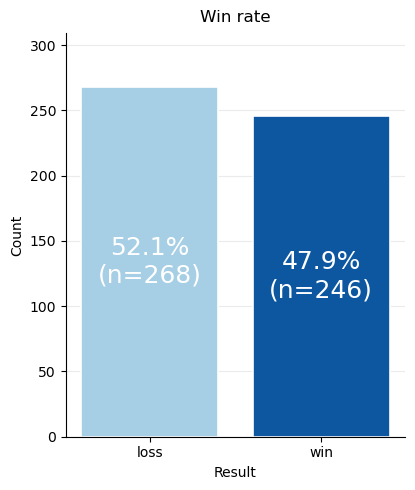

In [41]:
outcome_mat = df.groupby("outcome").size()
loss = int(outcome_mat.get(0, 0))
win = int(outcome_mat.get(1, 0))

counts = np.array([loss, win], dtype=int)
labels = ["loss", "win"]
total = counts.sum()
props = counts / total if total > 0 else np.zeros_like(counts, dtype=float)

# colors
cmap = plt.get_cmap("Blues")
colors = [cmap(0.35), cmap(0.85)]

fig, ax = plt.subplots(figsize=(4.25, 5))
bars = ax.bar(labels, counts, color=colors, edgecolor="white", linewidth=1.2)

# put proportion inside bar
for bar, p, c in zip(bars, props, counts):
    ax.text(bar.get_x() + bar.get_width()/ 2,
        bar.get_height()/ 2,
        f"{p:.1%}\n(n={c})",
        ha="center",
        va="center",
        color="white",
        fontsize=18,)

ax.set_title("Win rate", pad=8)
ax.set_xlabel("Result")
ax.set_ylabel("Count")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, alpha=0.25)
ax.set_axisbelow(True)
ax.set_ylim(0, max(counts) * 1.15+ 1)

fig.tight_layout()
fig.savefig("../figures/eda/winr.png", dpi=300, bbox_inches="tight")
plt.show()


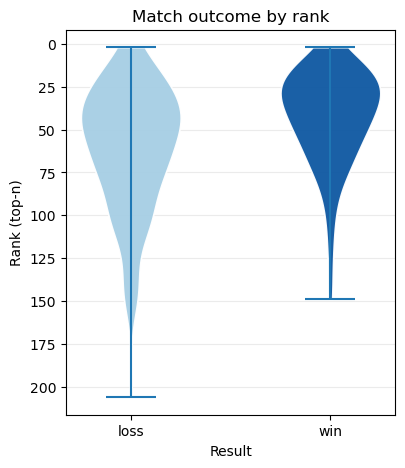

In [42]:
# rank by outcome
dataset = [
    df.loc[df["outcome"].eq(0), "rank"].dropna().to_numpy(),  # loss
    df.loc[df["outcome"].eq(1), "rank"].dropna().to_numpy(),  # win
]

cmap = plt.get_cmap("Blues")
colors = [cmap(0.35), cmap(0.85)]

plt.figure(figsize=(4.25, 5))
ax = plt.gca()

vp = plt.violinplot(dataset)

for body, col in zip(vp["bodies"], colors):
    body.set_facecolor(col)
    body.set_edgecolor("white")
    body.set_linewidth(1.2)
    body.set_alpha(0.95)

ax.set_title("Match outcome by rank")
ax.set_xticks([1, 2], ["loss", "win"])
ax.set_xlabel("Result")
ax.set_ylabel("Rank (top-n)")

ax.yaxis.grid(True, alpha=0.25)
ax.set_axisbelow(True)
ax.invert_yaxis()

plt.savefig("../figures/eda/rbo.png", dpi=300, bbox_inches="tight")
plt.show()

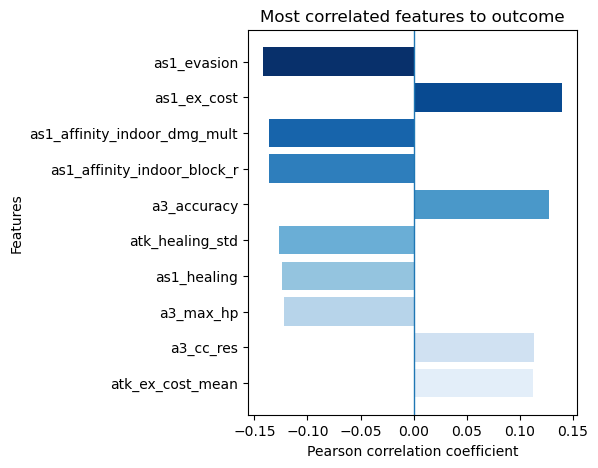

                              pearson_corr  abs_corr
as1_evasion                      -0.141976  0.141976
as1_ex_cost                       0.140008  0.140008
as1_affinity_indoor_dmg_mult     -0.136071  0.136071
as1_affinity_indoor_block_r      -0.136071  0.136071
a3_accuracy                       0.127641  0.127641
atk_healing_std                  -0.126699  0.126699
as1_healing                      -0.123917  0.123917
a3_max_hp                        -0.121703  0.121703
a3_cc_res                         0.113591  0.113591
atk_ex_cost_mean                  0.112327  0.112327


In [43]:
# returns pearson corr of cont vars with outcome
def pearson_corr_with_outcome(df: pd.DataFrame, target: str = 'outcome') -> pd.DataFrame:
    out = df.copy()

    num = out.select_dtypes(include=[np.number]).dropna(subset=[target])
    corrs = num.corr(numeric_only=True)[target].drop(index=target).sort_values(ascending=False)

    out = corrs.to_frame("pearson_corr")
    out["abs_corr"] = out["pearson_corr"].abs()
    out = out.sort_values("abs_corr", ascending=False)

    return out

pro = pd.read_csv('../data/processed/s9_final.csv')

corr_df = pearson_corr_with_outcome(pro, target="outcome")
corr_df.to_csv('../figures/eda/contfeats.csv')

t5 = corr_df.head(10)

cmap = plt.get_cmap("Blues")
n = len(t5)
colors = [cmap(x) for x in np.linspace(0.1, 1, n)]

# plot
plt.figure(figsize=(4.25, 5))
plt.barh(t5.index[::-1], t5["pearson_corr"].values[::-1], color=colors)
plt.axvline(0, linewidth=1)
plt.title(f"Most correlated features to outcome")
plt.xlabel("Pearson correlation coefficient")
plt.ylabel("Features")
plt.savefig('../figures/eda/contfeats.png', dpi=300, bbox_inches='tight')
plt.show()

print(t5)

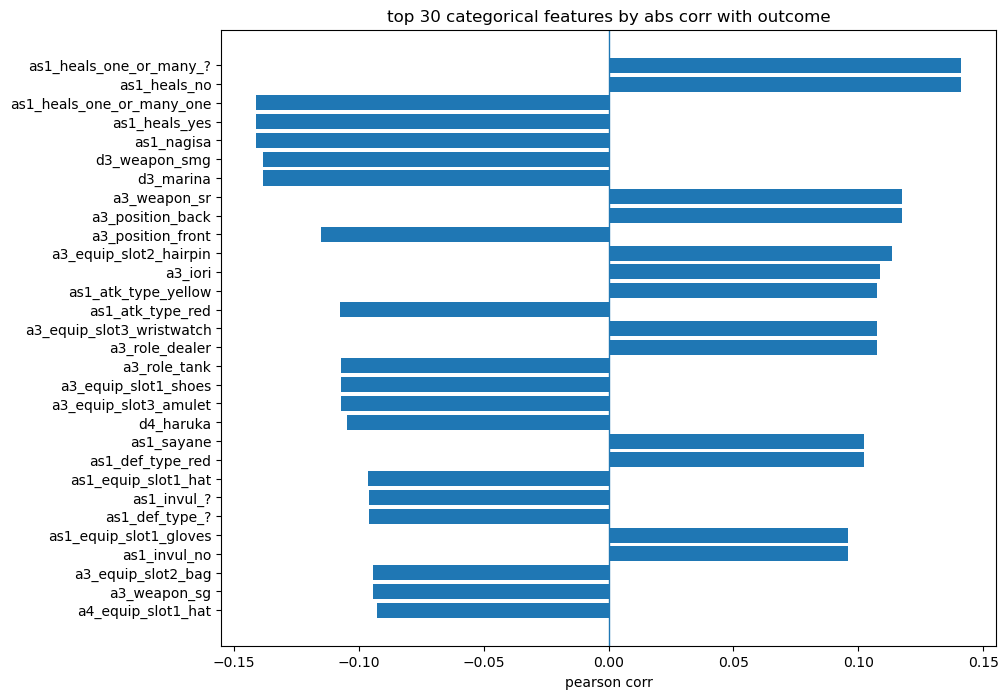

In [44]:
# returns pearson corr of cont vars (ohe) with outcome

def pearson_with_categoricals(df: pd.DataFrame, target="outcome"):
    out = df.copy()

    y = out[target]
    X_cat = out.drop(columns=[target]).select_dtypes(exclude=[np.number])

    X_oh = pd.get_dummies(X_cat)
    joined = pd.concat([y, X_oh], axis=1).dropna(subset=[target])

    corrs = joined.corr(numeric_only=True)[target].drop(index=target)
    out = (corrs.to_frame("pearson_corr")
    .assign(abs_corr=lambda d: d["pearson_corr"].abs())
    .sort_values("abs_corr", ascending=False))

    return out

cat_corrs = pearson_with_categoricals(full_csv, "outcome")
cat_corrs.to_csv('../figures/eda/catfeats.csv')

t30 = cat_corrs.head(30)

# plot
plt.figure(figsize=(10, 8))
plt.barh(t30.index[::-1], t30["pearson_corr"].values[::-1])
plt.axvline(0, linewidth=1)
plt.title(f"top 30 categorical features by abs corr with outcome")
plt.xlabel("pearson corr")
plt.savefig('../figures/eda/catfeats.png')
plt.show()

In [45]:
# missing values

df = df.replace("?", np.nan)

cols_with_missing = df.columns[df.isna().any()].tolist()

print(cols_with_missing)

overall_missing_prop = df.isna().to_numpy().mean()
print("overall missing proportion:", overall_missing_prop)

for col in cols_with_missing:
    prop = df[col].isna().mean()
    cnt  = df[col].isna().sum()
    print(f"{col:40} missing_prop={prop:.3f}  missing_count={cnt}")

['rank', 'd1_heals_team_or_self', 'd2_heals_team_or_self', 'd3_heals_team_or_self', 'd4_heals_team_or_self', 'a1_heals_team_or_self', 'a2_heals_team_or_self', 'a3_heals_team_or_self', 'a4_heals_team_or_self', 'ds1_def_type', 'ds1_invul', 'ds1_heals_one_or_many', 'ds2_def_type', 'ds2_invul', 'ds2_heals_one_or_many', 'as1_def_type', 'as1_invul', 'as1_heals_one_or_many', 'as2_def_type', 'as2_invul', 'as2_heals_one_or_many', 'ttk_ds1_to_atk_str']
overall missing proportion: 0.02429302368332363
rank                                     missing_prop=0.541  missing_count=278
d1_heals_team_or_self                    missing_prop=0.586  missing_count=301
d2_heals_team_or_self                    missing_prop=0.951  missing_count=489
d3_heals_team_or_self                    missing_prop=0.940  missing_count=483
d4_heals_team_or_self                    missing_prop=0.498  missing_count=256
a1_heals_team_or_self                    missing_prop=0.804  missing_count=413
a2_heals_team_or_self          

/var/folders/1c/h8d9s2m12xl44x37yf7xzw5h0000gn/T/ipykernel_2963/290698500.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("?", np.nan)


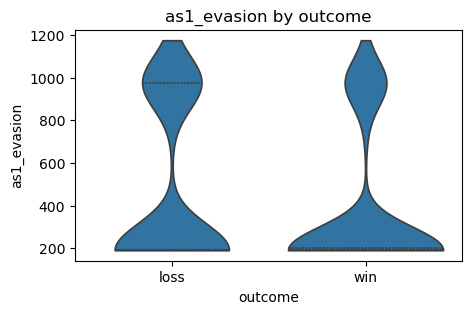

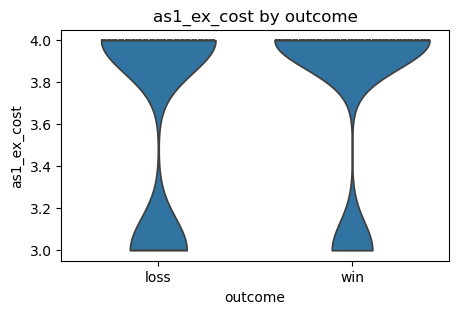

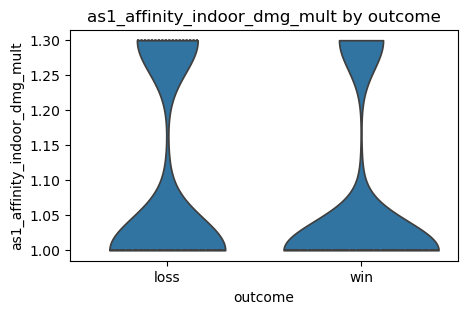

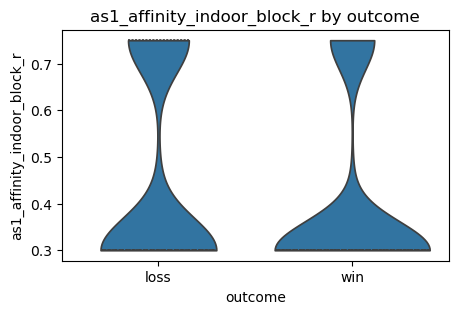

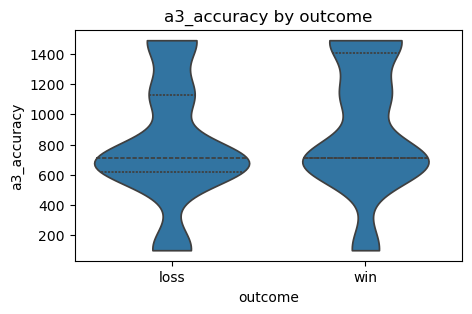

In [46]:
df = pd.read_csv('../data/processed/s9_final.csv')

top_k = 5
top_feats = corr_df.head(top_k).index.tolist()

# only numeric
top_feats = [c for c in top_feats if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

# plot
for c in top_feats:
    plt.figure(figsize=(5,3))
    sns.violinplot(x="outcome", y=c, data=df, inner="quartile", cut=0)
    plt.xticks([0,1], ["loss","win"])
    plt.title(f"{c} by outcome")
    plt.show()


In [47]:
df = pd.read_csv("../data/processed/s9_final.csv").replace("?", np.nan)
y = pd.to_numeric(df["outcome"], errors="coerce")

In [48]:
# parsing helpers
SLOT_RE = re.compile(r"^(a[1-4]|d[1-4]|as[12]|ds[12])_(.+)$")

def parse_slot_and_rest(col: str):
    m = SLOT_RE.match(col)
    if not m:
        return None, None
    return m.group(1), m.group(2)

# map families of features
def block_family(col: str) -> str:
    if col.startswith("ttk_"):
        return "ttk"
    if col.startswith(("atk_", "def_", "diff_")):
        if "_prop_FULL" in col:
            return "composition"
        return "team_agg"
    if "_affinity_" in col:
        return "affinity"
    slot, rest = parse_slot_and_rest(col)
    if slot is not None:
        return "slot_raw"
    if col in ["a1","a2","a3","a4","as1","as2","d1","d2","d3","d4","ds1","ds2"]:
        return "unit_id"
    return "other"

# families of slots
def slot_family(col: str) -> str:
    slot, rest = parse_slot_and_rest(col)
    if slot is not None:
        return slot
    if col.startswith("ttk_"):
        return "ttk_*"
    if col.startswith(("atk_", "def_", "diff_")):
        return "team_*"
    if "_affinity_" in col:
        return "affinity_*"
    return "other"

# families of unit attrs
def suffix_family(col: str) -> str:
    slot, rest = parse_slot_and_rest(col)
    if slot is not None:
        base = rest.split("=", 1)[0]
        return base
    if col.startswith("ttk_"):
        return "ttk"
    if col.startswith(("atk_", "def_", "diff_")):
        m = re.match(r"^(atk|def|diff)_(.+?)_(sum|mean|std)", col)
        if m:
            return m.group(2)
        if "_prop_FULL" in col:
            return "composition"
        return "team_agg_other"
    if "_affinity_" in col:
        idx = col.find("_affinity_")
        return col[idx+1:]
    return "other"

In [49]:
# tables (yay)
X = df.drop(columns=["outcome"])

# numeric
num = X.select_dtypes(include=[np.number]).apply(pd.to_numeric)
corr_num = num.corrwith(y)

# cats
cat = X.select_dtypes(exclude=[np.number]).copy()
X_oh = pd.get_dummies(cat, prefix_sep="=")
corr_cat = X_oh.apply(pd.to_numeric).corrwith(y)

corr = pd.concat([corr_num, corr_cat]).dropna()
corr_df = corr.to_frame("corr")
corr_df["abs_corr"] = corr_df["corr"].abs()

corr_df["block"] = corr_df.index.map(block_family)
corr_df["slot"] = corr_df.index.map(slot_family)
corr_df["suffix"] = corr_df.index.map(suffix_family)

# aggregate
def agg_table(group_col: str):
    return (corr_df.groupby(group_col).agg(
        n_features=("corr", "size"),
        mean_abs_corr=("abs_corr", "mean"),
        max_abs_corr=("abs_corr", "max"),
        sum_abs_corr=("abs_corr", "sum"))
        .sort_values("mean_abs_corr", ascending=False))

block_tab = agg_table("block")
slot_tab = agg_table("slot")
suffix_tab = agg_table("suffix")

print("block fams\n")
print(block_tab.head(10))

print("slot fams\n")
print(slot_tab.head(10))

print("attribute fams\n")
print(suffix_tab.head(10))

block fams

             n_features  mean_abs_corr  max_abs_corr  sum_abs_corr
block                                                             
affinity             22       0.044486      0.136071      0.978690
slot_raw            547       0.044339      0.141976     24.253593
other               105       0.040399      0.141020      4.241924
team_agg             81       0.037795      0.126699      3.061400
ttk                  18       0.025573      0.101204      0.460305
composition          10       0.007314      0.012839      0.073140
slot fams

       n_features  mean_abs_corr  max_abs_corr  sum_abs_corr
slot                                                        
as1            32       0.076112      0.141976      2.435593
a3             59       0.061614      0.127641      3.635213
d3             59       0.048472      0.138324      2.859874
d1             58       0.047418      0.084843      2.750264
ds2            20       0.042300      0.042300      0.846002
d4            

/Users/jmu/miniconda/envs/data1030_2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jmu/miniconda/envs/data1030_2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/jmu/miniconda/envs/data1030_2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jmu/miniconda/envs/data1030_2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


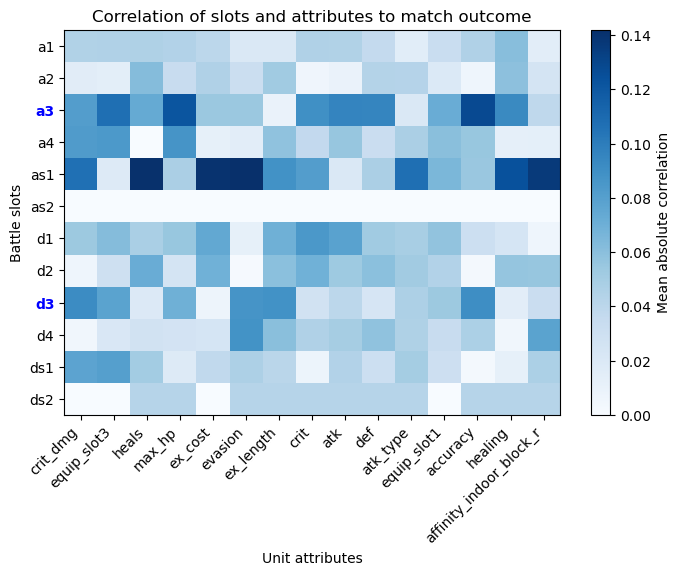

In [50]:
# slot by attr heatmap
slots_of_interest = ["a1","a2","a3","a4","as1","as2","d1","d2","d3","d4","ds1","ds2"]

heat = (corr_df[corr_df["slot"].isin(slots_of_interest)]
        .groupby(["slot","suffix"])["abs_corr"].mean()
        .unstack("suffix"))

# keep only some
keep = (heat.notna().sum(axis=0) >= 10)
heat = heat.loc[:, keep]

# take only toply corr attrs
how_many = 15
t_a = heat.mean(axis=0).sort_values(ascending=False).head(how_many).index
heat = heat[t_a]

# plot
fig, ax = plt.subplots(figsize=(8, 5))

im = ax.imshow(heat.fillna(0).values, aspect="auto", cmap="Blues")

ax.set_yticks(range(len(heat.index)))
ax.set_yticklabels(heat.index)
highlight = {"d3", "a3"}
for tick in ax.get_yticklabels():
    if tick.get_text() in highlight:
        tick.set_color("blue")
        tick.set_fontweight("bold")

ax.set_xticks(range(len(heat.columns)))
ax.set_xticklabels(heat.columns, rotation=45, ha="right")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Mean absolute correlation")

ax.set_title("Correlation of slots and attributes to match outcome")
ax.set_xlabel("Unit attributes")
ax.set_ylabel("Battle slots")

plt.savefig('../figures/eda/corr_heatmap.png', dpi=300, bbox_inches = 'tight')
plt.show()
